In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from NeuralNetworkClass import NeuralNetwork

In [19]:
# Fetch the MNIST dataset
print("Fetching MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(int)

# Print sizes and shapes before standardization
print(f"Before Standardization:")
print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}\n")

Fetching MNIST dataset...
Before Standardization:
X.shape: (70000, 784)
y.shape: (70000,)



In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
# Standardize the data
print("Standardizing data...")
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
print("Splitting data into training and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transpose the data arrays for compatibility with the NeuralNetwork class
print("Transposing data for NeuralNetwork compatibility...")
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

# Print sizes and shapes after transposing
print(f"After Transposing:")
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}\n")

Standardizing data...
Splitting data into training and test sets...
Transposing data for NeuralNetwork compatibility...
After Transposing:
X_train.shape: (784, 56000)
X_test.shape: (784, 14000)
y_train.shape: (56000,)
y_test.shape: (14000,)



In [22]:
# Initialize and train the neural network
print("Initializing and training NeuralNetwork...")
nn = NeuralNetwork(epochs = 1500, learningRate = 0.1)
nn.train(X_train, y_train)

Initializing and training NeuralNetwork...
Epoch 0: Loss = 8.0826, Accuracy = 16.2018%
Epoch 50: Loss = 1.2979, Accuracy = 59.5893%
Epoch 100: Loss = 1.0149, Accuracy = 68.4893%
Epoch 150: Loss = 0.8645, Accuracy = 73.3804%
Epoch 200: Loss = 0.7704, Accuracy = 76.5500%
Epoch 250: Loss = 0.7052, Accuracy = 78.7929%
Epoch 300: Loss = 0.6569, Accuracy = 80.3607%
Epoch 350: Loss = 0.6194, Accuracy = 81.6250%
Epoch 400: Loss = 0.5894, Accuracy = 82.5696%
Epoch 450: Loss = 0.5649, Accuracy = 83.3107%
Epoch 500: Loss = 0.5444, Accuracy = 83.9339%
Epoch 550: Loss = 0.5268, Accuracy = 84.3982%
Epoch 600: Loss = 0.5115, Accuracy = 84.8625%
Epoch 650: Loss = 0.4980, Accuracy = 85.2839%
Epoch 700: Loss = 0.4859, Accuracy = 85.6518%
Epoch 750: Loss = 0.4751, Accuracy = 86.0161%
Epoch 800: Loss = 0.4653, Accuracy = 86.2643%
Epoch 850: Loss = 0.4563, Accuracy = 86.4964%
Epoch 900: Loss = 0.4480, Accuracy = 86.7411%
Epoch 950: Loss = 0.4405, Accuracy = 86.9804%
Epoch 1000: Loss = 0.4335, Accuracy = 87

In [35]:
# Make predictions on the test set
print("Making predictions on the test set...")
predictions = nn.predict(X_test)

# Function to calculate accuracy
def accuracy(predictions, y_test):
    return np.sum(predictions == y_test) / y_test.size

# Calculate and print the accuracy of the model on the test set
acc = accuracy(predictions, y_test)
print(f"\nTest set accuracy: {acc * 100:.4f}%")

Making predictions on the test set...

Test set accuracy: 87.9929%


In [36]:
# This function will display a picture from the test set along with the predicted and actual labels

def picturePredict(X_test, y_test, index):
    current_image = X_test[:, index].reshape(-1, 1)
    predicted_label = predictions[index]
    correct_label = y_test[index]
    
    current_image = current_image.reshape((28, 28)) * 255  # Reshape for plotting
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.title(f'Predicted Label: {predicted_label}, Actual Label: {correct_label}')
    plt.show()

In [37]:
# unscale the test data
X_test_unscaled = scaler.inverse_transform(X_test.T)

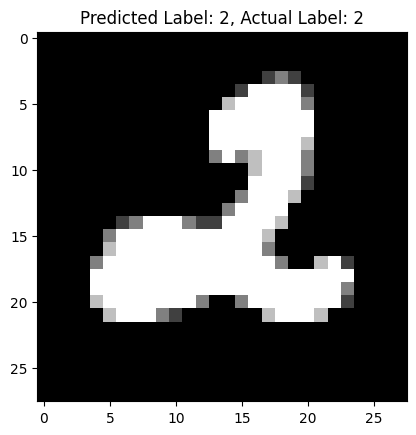

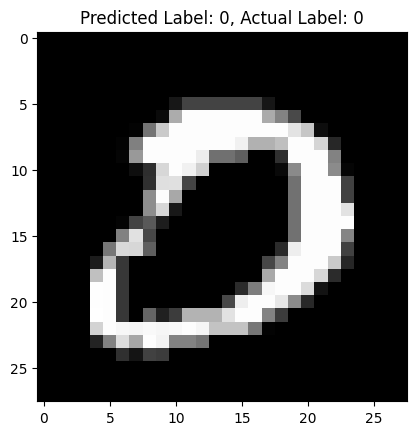

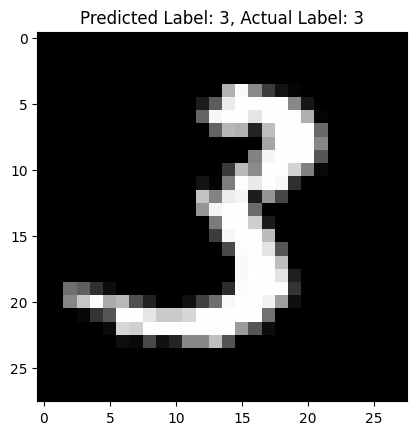

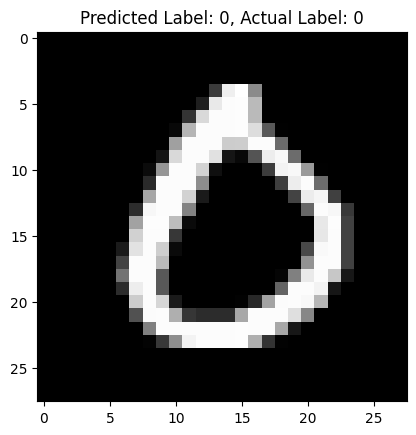

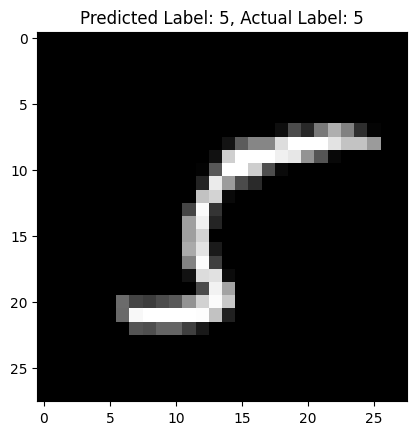

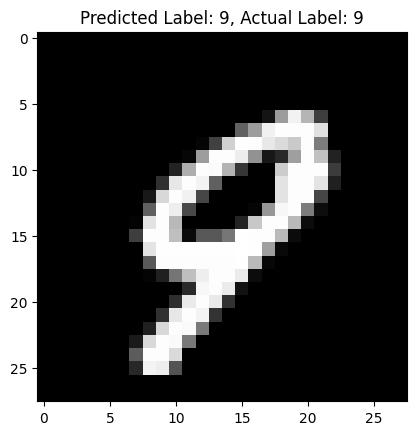

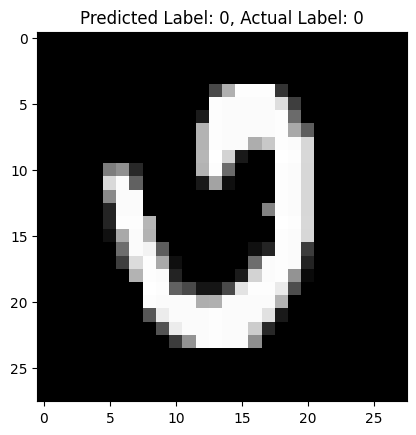

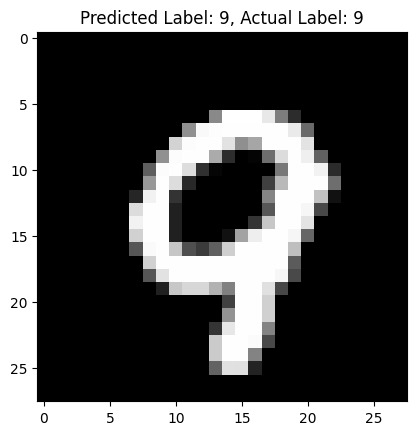

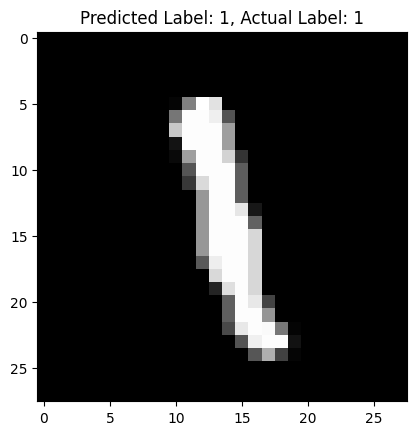

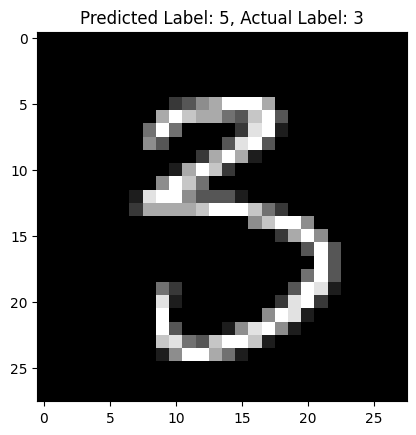

In [38]:
# Visualize prediction for random images in the test set
randomIndices = np.random.choice(X_test.shape[1], 10, replace=False)
for index_to_visualize in randomIndices:
    try:
        picturePredict(X_test = X_test_unscaled.T,y_test = y_test, index=index_to_visualize)
    except IndexError as e:
        print(f"Error: {e}")

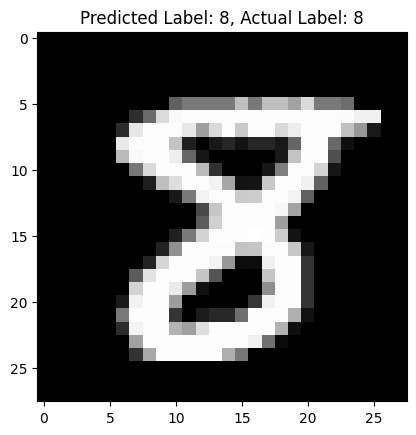

In [39]:
# This will visualize the prediction for the image at the specified index

index_to_visualize = 0
if index_to_visualize >= X_test.shape[1]:
    index_to_visualize = X_test.shape[1] - 1
try:
    picturePredict(X_test = X_test_unscaled.T,y_test = y_test, index=index_to_visualize)
except IndexError as e:
    print(f"Error: {e}")

In [40]:
# This will predict for a single image
index_to_predict = 0
X_single = X_test[:, index_to_predict].reshape(-1, 1)
prediction = nn.predict(X_single)
print(f"Predicted Label: {prediction}")
actual = y_test[index_to_predict]
print(f"Actual Label: {actual}")

Predicted Label: [8]
Actual Label: 8
